In [131]:
import pandas as pd
import numpy as np

import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

# Sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [132]:
df_train = pd.read_csv(r"./house-prices-advanced-regression-techniques/train.csv")
df_test = pd.read_csv(r"./house-prices-advanced-regression-techniques/test.csv")
df_price = pd.read_csv(r"./house-prices-advanced-regression-techniques/sample_submission.csv")

In [133]:
df_train

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal     208500  
1         5   2007        WD         Normal     181500  
2         9   2008        WD         Normal     223500  
3         2   2006        WD        Abnorml     140000  
4        12   2008        WD         Normal     250000  
...     ...    ...       ...            ...        ...  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

In [134]:
df_test

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     1461          20       RH         80.0    11622   Pave   NaN      Reg   
1     1462          20       RL         81.0    14267   Pave   NaN      IR1   
2     1463          60       RL         74.0    13830   Pave   NaN      IR1   
3     1464          60       RL         78.0     9978   Pave   NaN      IR1   
4     1465         120       RL         43.0     5005   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1454  2915         160       RM         21.0     1936   Pave   NaN      Reg   
1455  2916         160       RM         21.0     1894   Pave   NaN      Reg   
1456  2917          20       RL        160.0    20000   Pave   NaN      Reg   
1457  2918          85       RL         62.0    10441   Pave   NaN      Reg   
1458  2919          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence  \
0            Lvl    AllPub  ...         120        0    NaN  MnPrv   
1            Lvl    AllPub  ...           0        0    NaN    NaN   
2            Lvl    AllPub  ...           0        0    NaN  MnPrv   
3            Lvl    AllPub  ...           0        0    NaN    NaN   
4            HLS    AllPub  ...         144        0    NaN    NaN   
...          ...       ...  ...         ...      ...    ...    ...   
1454         Lvl    AllPub  ...           0        0    NaN    NaN   
1455         Lvl    AllPub  ...           0        0    NaN    NaN   
1456         Lvl    AllPub  ...           0        0    NaN    NaN   
1457         Lvl    AllPub  ...           0        0    NaN  MnPrv   
1458         Lvl    AllPub  ...           0        0    NaN    NaN   

     MiscFeature MiscVal MoSold  YrSold  SaleType  SaleCondition  
0            NaN       0      6    2010        WD         Normal  
1           Gar2   12500      6    2010        WD         Normal  
2            NaN       0      3    2010        WD         Normal  
3            NaN       0      6    2010        WD         Normal  
4            NaN       0      1    2010        WD         Normal  
...          ...     ...    ...     ...       ...            ...  
1454         NaN       0      6    2006        WD         Normal  
1455         NaN       0      4    2006        WD        Abnorml  
1456         NaN       0      9    2006        WD        Abnorml  
1457        Shed     700      7    2006        WD         Normal  
1458         NaN       0     11    2006        WD         Normal  

[1459 rows x 80 columns]

In [135]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

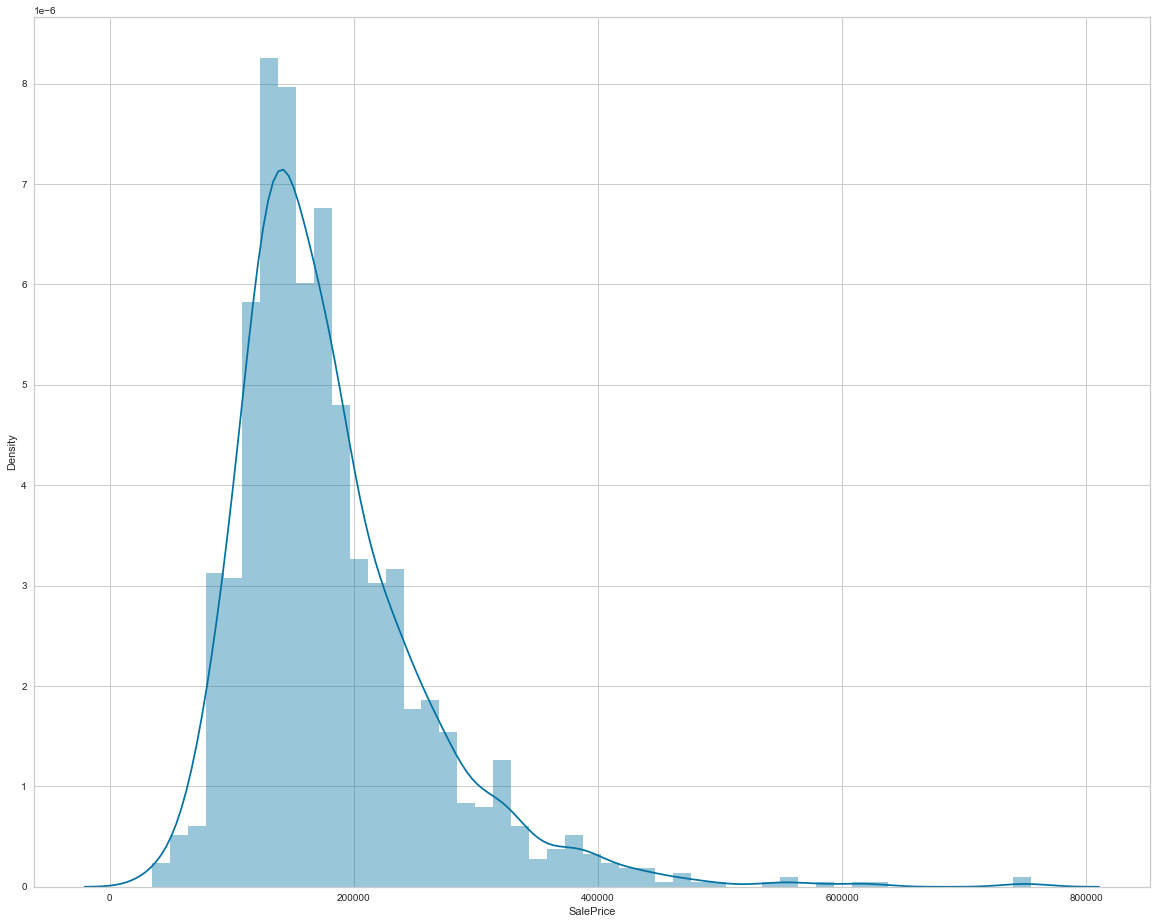

In [136]:
plt.figure(figsize=(20, 16))
sns.distplot(df_train['SalePrice'])

In [137]:
# Merge test and train data

df_test = df_test.merge(df_price, left_on="Id", right_on="Id")
df_total = pd.concat([df_train, df_test])
df_total.set_index('Id', inplace=True)

In [138]:
# Display NaN percents by columns
df_total_percent_missing = (df_total.isna().sum() / len(df_total)) * 100
df_total_percent_missing_sorted = df_total_percent_missing.sort_values(ascending=False).head(35)
print(df_total_percent_missing_sorted)

PoolQC          99.657417
MiscFeature     96.402878
Alley           93.216855
Fence           80.438506
FireplaceQu     48.646797
LotFrontage     16.649538
GarageCond       5.447071
GarageQual       5.447071
GarageYrBlt      5.447071
GarageFinish     5.447071
GarageType       5.378554
BsmtCond         2.809181
BsmtExposure     2.809181
BsmtQual         2.774923
BsmtFinType2     2.740665
BsmtFinType1     2.706406
MasVnrType       0.822199
MasVnrArea       0.787941
MSZoning         0.137033
BsmtHalfBath     0.068517
Functional       0.068517
BsmtFullBath     0.068517
Utilities        0.068517
BsmtUnfSF        0.034258
KitchenQual      0.034258
BsmtFinSF1       0.034258
SaleType         0.034258
GarageCars       0.034258
GarageArea       0.034258
TotalBsmtSF      0.034258
Exterior2nd      0.034258
Exterior1st      0.034258
Electrical       0.034258
BsmtFinSF2       0.034258
TotRmsAbvGrd     0.000000
dtype: float64


In [139]:
df_num_cleaned = df_total.select_dtypes(include = ['float64', 'int64'])
df_num_cleaned.fillna(df_num_cleaned.median(), inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [140]:
df_num_cleaned

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
Id                                                                            
1             60         65.0     8450            7            5       2003   
2             20         80.0     9600            6            8       1976   
3             60         68.0    11250            7            5       2001   
4             70         60.0     9550            7            5       1915   
5             60         84.0    14260            8            5       2000   
...          ...          ...      ...          ...          ...        ...   
2915         160         21.0     1936            4            7       1970   
2916         160         21.0     1894            4            5       1970   
2917          20        160.0    20000            5            7       1960   
2918          85         62.0    10441            5            5       1992   
2919          60         74.0     9627            7            5       1993   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  WoodDeckSF  \
Id                                                      ...               
1             2003       196.0       706.0         0.0  ...           0   
2             1976         0.0       978.0         0.0  ...         298   
3             2002       162.0       486.0         0.0  ...           0   
4             1970         0.0       216.0         0.0  ...           0   
5             2000       350.0       655.0         0.0  ...         192   
...            ...         ...         ...         ...  ...         ...   
2915          1970         0.0         0.0         0.0  ...           0   
2916          1970         0.0       252.0         0.0  ...           0   
2917          1996         0.0      1224.0         0.0  ...         474   
2918          1992         0.0       337.0         0.0  ...          80   
2919          1994        94.0       758.0         0.0  ...         190   

      OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
Id                                                                            
1              61              0          0            0         0        0   
2               0              0          0            0         0        0   
3              42              0          0            0         0        0   
4              35            272          0            0         0        0   
5              84              0          0            0         0        0   
...           ...            ...        ...          ...       ...      ...   
2915            0              0          0            0         0        0   
2916           24              0          0            0         0        0   
2917            0              0          0            0         0        0   
2918           32              0          0            0         0      700   
2919           48              0          0            0         0        0   

      MoSold  YrSold      SalePrice  
Id                                   
1          2    2008  208500.000000  
2          5    2007  181500.000000  
3          9    2008  223500.000000  
4          2    2006  140000.000000  
5         12    2008  250000.000000  
...      ...     ...            ...  
2915       6    2006  167081.220949  
2916       4    2006  164788.778231  
2917       9    2006  219222.423400  
2918       7    2006  184924.279659  
2919      11    2006  187741.866657  

[2919 rows x 37 columns]

In [141]:
y_train = df_num_cleaned.loc[df_num_cleaned.index < 1461, ['SalePrice']].to_numpy()
y_test = df_num_cleaned.loc[df_num_cleaned.index >= 1461, ['SalePrice']].to_numpy()

In [142]:
df_num_and_categorical = df_total
df_total_percent_missing = (df_num_and_categorical.isna().sum() / len(df_num_and_categorical)) * 100
df_total_percent_missing_sorted = df_total_percent_missing.sort_values(ascending=False).head(35)
df_total_percent_missing_sorted

PoolQC          99.657417
MiscFeature     96.402878
Alley           93.216855
Fence           80.438506
FireplaceQu     48.646797
LotFrontage     16.649538
GarageCond       5.447071
GarageQual       5.447071
GarageYrBlt      5.447071
GarageFinish     5.447071
GarageType       5.378554
BsmtCond         2.809181
BsmtExposure     2.809181
BsmtQual         2.774923
BsmtFinType2     2.740665
BsmtFinType1     2.706406
MasVnrType       0.822199
MasVnrArea       0.787941
MSZoning         0.137033
BsmtHalfBath     0.068517
Functional       0.068517
BsmtFullBath     0.068517
Utilities        0.068517
BsmtUnfSF        0.034258
KitchenQual      0.034258
BsmtFinSF1       0.034258
SaleType         0.034258
GarageCars       0.034258
GarageArea       0.034258
TotalBsmtSF      0.034258
Exterior2nd      0.034258
Exterior1st      0.034258
Electrical       0.034258
BsmtFinSF2       0.034258
TotRmsAbvGrd     0.000000
dtype: float64

In [143]:
# Split to fill NaN
df_numerique = df_num_and_categorical.select_dtypes(include=['int64', 'float64'])
df_categorical = df_num_and_categorical.select_dtypes(include=['object'])

# Fill NaN
df_numerique.fillna(df_numerique.median(), inplace=True)
df_categorical.fillna("unknown", inplace=True)

# Concat
df_num_and_categorical = pd.concat([df_numerique, df_categorical], axis=1)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:5176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [144]:
# Normalize all columns
df_num_all_normalized = df_num_and_categorical
numerical_columns = df_num_all_normalized.select_dtypes(include=['int64', 'float64']).columns.drop(['Id', 'SalePrice'], errors='ignore')

scaler = MinMaxScaler()
df_num_all_normalized[numerical_columns] = scaler.fit_transform(df_num_all_normalized[numerical_columns])

In [145]:
df_num_all_normalized

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
Id                                                                             
1       0.235294     0.150685  0.033420     0.666667        0.500   0.949275   
2       0.000000     0.202055  0.038795     0.555556        0.875   0.753623   
3       0.235294     0.160959  0.046507     0.666667        0.500   0.934783   
4       0.294118     0.133562  0.038561     0.666667        0.500   0.311594   
5       0.235294     0.215753  0.060576     0.777778        0.500   0.927536   
...          ...          ...       ...          ...          ...        ...   
2915    0.823529     0.000000  0.002973     0.333333        0.750   0.710145   
2916    0.823529     0.000000  0.002776     0.333333        0.500   0.710145   
2917    0.000000     0.476027  0.087406     0.444444        0.750   0.637681   
2918    0.382353     0.140411  0.042726     0.444444        0.500   0.869565   
2919    0.235294     0.181507  0.038921     0.666667        0.500   0.876812   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  GarageType  \
Id                                                      ...               
1         0.883333     0.12250    0.125089         0.0  ...      Attchd   
2         0.433333     0.00000    0.173281         0.0  ...      Attchd   
3         0.866667     0.10125    0.086109         0.0  ...      Attchd   
4         0.333333     0.00000    0.038271         0.0  ...      Detchd   
5         0.833333     0.21875    0.116052         0.0  ...      Attchd   
...            ...         ...         ...         ...  ...         ...   
2915      0.333333     0.00000    0.000000         0.0  ...     unknown   
2916      0.333333     0.00000    0.044649         0.0  ...     CarPort   
2917      0.766667     0.00000    0.216867         0.0  ...      Detchd   
2918      0.700000     0.00000    0.059709         0.0  ...     unknown   
2919      0.733333     0.05875    0.134302         0.0  ...      Attchd   

      GarageFinish  GarageQual  GarageCond  PavedDrive   PoolQC    Fence  \
Id                                                                         
1              RFn          TA          TA           Y  unknown  unknown   
2              RFn          TA          TA           Y  unknown  unknown   
3              RFn          TA          TA           Y  unknown  unknown   
4              Unf          TA          TA           Y  unknown  unknown   
5              RFn          TA          TA           Y  unknown  unknown   
...            ...         ...         ...         ...      ...      ...   
2915       unknown     unknown     unknown           Y  unknown  unknown   
2916           Unf          TA          TA           Y  unknown  unknown   
2917           Unf          TA          TA           Y  unknown  unknown   
2918       unknown     unknown     unknown           Y  unknown    MnPrv   
2919           Fin          TA          TA           Y  unknown  unknown   

      MiscFeature  SaleType  SaleCondition  
Id                                          
1         unknown        WD         Normal  
2         unknown        WD         Normal  
3         unknown        WD         Normal  
4         unknown        WD        Abnorml  
5         unknown        WD         Normal  
...           ...       ...            ...  
2915      unknown        WD         Normal  
2916      unknown        WD        Abnorml  
2917      unknown        WD        Abnorml  
2918         Shed        WD         Normal  
2919      unknown        WD         Normal  

[2919 rows x 80 columns]

In [146]:
############### One Hot Encoding ###############
df_encoded_OH = df_num_all_normalized

categorical_columns = df_encoded_OH.select_dtypes(include=['object']).columns

encoder = OneHotEncoder(handle_unknown='ignore')

df_encoded = pd.DataFrame(encoder.fit_transform(df_encoded_OH[categorical_columns]).toarray(),
                          columns=encoder.get_feature_names_out(categorical_columns))

df_encoded_OH = pd.concat([df_encoded_OH, df_encoded], axis=1)


df_encoded_OH = df_encoded_OH.drop(categorical_columns, axis=1)

df_encoded_OH

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
0            NaN          NaN       NaN          NaN          NaN        NaN   
1       0.235294     0.150685  0.033420     0.666667        0.500   0.949275   
2       0.000000     0.202055  0.038795     0.555556        0.875   0.753623   
3       0.235294     0.160959  0.046507     0.666667        0.500   0.934783   
4       0.294118     0.133562  0.038561     0.666667        0.500   0.311594   
...          ...          ...       ...          ...          ...        ...   
2915    0.823529     0.000000  0.002973     0.333333        0.750   0.710145   
2916    0.823529     0.000000  0.002776     0.333333        0.500   0.710145   
2917    0.000000     0.476027  0.087406     0.444444        0.750   0.637681   
2918    0.382353     0.140411  0.042726     0.444444        0.500   0.869565   
2919    0.235294     0.181507  0.038921     0.666667        0.500   0.876812   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  SaleType_New  \
0              NaN         NaN         NaN         NaN  ...           0.0   
1         0.883333     0.12250    0.125089         0.0  ...           0.0   
2         0.433333     0.00000    0.173281         0.0  ...           0.0   
3         0.866667     0.10125    0.086109         0.0  ...           0.0   
4         0.333333     0.00000    0.038271         0.0  ...           0.0   
...            ...         ...         ...         ...  ...           ...   
2915      0.333333     0.00000    0.000000         0.0  ...           0.0   
2916      0.333333     0.00000    0.044649         0.0  ...           0.0   
2917      0.766667     0.00000    0.216867         0.0  ...           0.0   
2918      0.700000     0.00000    0.059709         0.0  ...           0.0   
2919      0.733333     0.05875    0.134302         0.0  ...           NaN   

      SaleType_Oth  SaleType_WD  SaleType_unknown  SaleCondition_Abnorml  \
0              0.0          1.0               0.0                    0.0   
1              0.0          1.0               0.0                    0.0   
2              0.0          1.0               0.0                    0.0   
3              0.0          1.0               0.0                    1.0   
4              0.0          1.0               0.0                    0.0   
...            ...          ...               ...                    ...   
2915           0.0          1.0               0.0                    1.0   
2916           0.0          1.0               0.0                    1.0   
2917           0.0          1.0               0.0                    0.0   
2918           0.0          1.0               0.0                    0.0   
2919           NaN          NaN               NaN                    NaN   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                       0.0                   0.0                   0.0   
1                       0.0                   0.0                   0.0   
2                       0.0                   0.0                   0.0   
3                       0.0                   0.0                   0.0   
4                       0.0                   0.0                   0.0   
...                     ...                   ...                   ...   
2915                    0.0                   0.0                   0.0   
2916                    0.0                   0.0                   0.0   
2917                    0.0                   0.0                   0.0   
2918                    0.0                   0.0                   0.0   
2919                    NaN                   NaN                   NaN   

      SaleCondition_Normal  SaleCondition_Partial  
0                      1.0                    0.0  
1                      1.0                    0.0  
2                      1.0                    0.0  
3                      0.0                    0.0  
4                      1.0                    

In [147]:
df_encoded_OH.isna().sum()

MSSubClass               1
LotFrontage              1
LotArea                  1
OverallQual              1
OverallCond              1
                        ..
SaleCondition_AdjLand    1
SaleCondition_Alloca     1
SaleCondition_Family     1
SaleCondition_Normal     1
SaleCondition_Partial    1
Length: 312, dtype: int64

In [148]:
df_encoded_OH = df_encoded_OH.fillna(df_encoded_OH.median())

In [149]:
df_encoded_OH.isna().sum().sum()

0

In [150]:
df_encoded_OH.drop("SalePrice", axis=1, inplace=True)

In [151]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(df_encoded_OH)
res=pca.explained_variance_ratio_
res*100

array([1.40409875e+01, 5.82613844e+00, 3.49886335e+00, 3.02027662e+00,
       2.87820833e+00, 2.67918156e+00, 2.38095173e+00, 2.18741627e+00,
       2.12503848e+00, 1.98015737e+00, 1.83275828e+00, 1.76056764e+00,
       1.68670266e+00, 1.56044724e+00, 1.54315395e+00, 1.45031313e+00,
       1.41929171e+00, 1.35217072e+00, 1.33779760e+00, 1.29190127e+00,
       1.26781472e+00, 1.21311489e+00, 1.16291413e+00, 1.13106302e+00,
       1.06595399e+00, 1.03405230e+00, 1.00104634e+00, 9.66220258e-01,
       9.17659127e-01, 8.90743859e-01, 8.75164173e-01, 8.37168100e-01,
       7.94750636e-01, 7.61852027e-01, 7.43014452e-01, 7.20929998e-01,
       7.13578260e-01, 6.80324537e-01, 6.61566183e-01, 6.50264641e-01,
       6.40712970e-01, 6.25285097e-01, 6.00416839e-01, 5.89858001e-01,
       5.65497437e-01, 5.61590120e-01, 5.51588795e-01, 5.41514900e-01,
       5.29386341e-01, 5.11835323e-01, 4.90801030e-01, 4.78161331e-01,
       4.60612371e-01, 4.55604675e-01, 4.36812783e-01, 4.20602196e-01,
      

In [152]:
100/312*10

3.2051282051282053

In [153]:
df_encoded_OH.shape[1]

311

In [154]:
# Critère de Kaiser
number_of_column = sum(res*100>(100/df_encoded_OH.shape[1]))
number_of_column

67

In [155]:
df_pca_filtered = df_encoded_OH.iloc[:, :number_of_column].drop(df_encoded_OH.index[0])

In [156]:
df_pca_filtered

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
1       0.235294     0.150685  0.033420     0.666667        0.500   0.949275   
2       0.000000     0.202055  0.038795     0.555556        0.875   0.753623   
3       0.235294     0.160959  0.046507     0.666667        0.500   0.934783   
4       0.294118     0.133562  0.038561     0.666667        0.500   0.311594   
5       0.235294     0.215753  0.060576     0.777778        0.500   0.927536   
...          ...          ...       ...          ...          ...        ...   
2915    0.823529     0.000000  0.002973     0.333333        0.750   0.710145   
2916    0.823529     0.000000  0.002776     0.333333        0.500   0.710145   
2917    0.000000     0.476027  0.087406     0.444444        0.750   0.637681   
2918    0.382353     0.140411  0.042726     0.444444        0.500   0.869565   
2919    0.235294     0.181507  0.038921     0.666667        0.500   0.876812   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  \
1         0.883333     0.12250    0.125089         0.0  ...   
2         0.433333     0.00000    0.173281         0.0  ...   
3         0.866667     0.10125    0.086109         0.0  ...   
4         0.333333     0.00000    0.038271         0.0  ...   
5         0.833333     0.21875    0.116052         0.0  ...   
...            ...         ...         ...         ...  ...   
2915      0.333333     0.00000    0.000000         0.0  ...   
2916      0.333333     0.00000    0.044649         0.0  ...   
2917      0.766667     0.00000    0.216867         0.0  ...   
2918      0.700000     0.00000    0.059709         0.0  ...   
2919      0.733333     0.05875    0.134302         0.0  ...   

      Utilities_unknown  LotConfig_Corner  LotConfig_CulDSac  LotConfig_FR2  \
1                   0.0               0.0                0.0            1.0   
2                   0.0               0.0                0.0            0.0   
3                   0.0               1.0                0.0            0.0   
4                   0.0               0.0                0.0            1.0   
5                   0.0               0.0                0.0            0.0   
...                 ...               ...                ...            ...   
2915                0.0               0.0                0.0            0.0   
2916                0.0               0.0                0.0            0.0   
2917                0.0               0.0                0.0            0.0   
2918                0.0               0.0                0.0            0.0   
2919                0.0               0.0                0.0            0.0   

      LotConfig_FR3  LotConfig_Inside  LandSlope_Gtl  LandSlope_Mod  \
1               0.0               0.0            1.0            0.0   
2               0.0               1.0            1.0            0.0   
3               0.0               0.0            1.0            0.0   
4               0.0               0.0            1.0            0.0   
5               0.0               1.0            1.0            0.0   
...             ...               ...            ...            ...   
2915            0.0               1.0            1.0            0.0   
2916            0.0               1.0            1.0            0.0   
2917            0.0               1.0            1.0            0.0   
2918            0.0               1.0            0.0            1.0   
2919            0.0               1.0            1.0            0.0   

      LandSlope_Sev  Neighborhood_Blmngtn  
1               0.0                   0.0  
2               0.0                   0.0  
3               0.0                   0.0  
4               0.0                   0.0  
5               0.0                   0.0  
...             ...                   ...  
2915            0.0                   0.0  
2916            0.0                   0.0  
2917            0.0                   0.0  
2918            0.0                   0.0  
29

In [157]:
y_train = np.log(y_train)

In [158]:
X_train = df_pca_filtered[df_pca_filtered.index < 1461].to_numpy()
X_test = df_pca_filtered[df_pca_filtered.index >= 1461].to_numpy()

In [159]:
df_pca_filtered.isna().sum().sum()

0

In [171]:
def ml_processing(X_train, y_train, X_test, y_test):
    
    print("ML Processing \n\n")

    ### Ridge Regression #####

    clf = Ridge(alpha = 1.0).fit(X_train, y_train)
    y_pred = np.expm1(clf.predict(X_test))
    accuracy = clf.score(X_test, y_test)
    error = root_mean_squared_error(np.log(y_test), np.log(y_pred))
    print("Ridge Regression accuracy : ", accuracy)
    print("Ridge Regression error : ", error, "\n")

    ##### Logistic Regression #####

    clf = LinearRegression().fit(X_train, y_train)
    y_pred = np.expm1(clf.predict(X_test))
    accuracy = clf.score(X_test, y_test)
    print("Linear Regression accuracy :", accuracy, "\n")

    ##### Tree Regressor #####

    clf = DecisionTreeRegressor().fit(X_train,y_train)
    y_pred = np.expm1(clf.predict(X_test))
    accuracy = clf.score(X_test, y_test)
    error = root_mean_squared_error(np.log(y_test), np.log(y_pred))
    print("Tree Regressor accuracy : ", accuracy)
    print("Tree Regressor error : ", error, "\n")

    ##### Random Forest Regressor #####

    clf = RandomForestRegressor().fit(X_train,y_train)
    y_pred = np.expm1(clf.predict(X_test))
    accuracy = clf.score(X_test, y_test)
    error = root_mean_squared_error(np.log(y_test), np.log(y_pred))
    print("Random Forest Regressor accuracy : ", accuracy)
    print("Random Forest Regressor error : ", error, "\n")

In [172]:
ml_processing(X_train, y_train, X_test, y_test)

ML Processing 


Ridge Regression accuracy :  -117.73529740375248
Ridge Regression error :  0.3633093871467106 

Linear Regression accuracy : -9007169290437.996 

Tree Regressor accuracy :  -117.73530342112142
Tree Regressor error :  0.4020591140554206 



C:\Users\jujuc\AppData\Local\Temp/ipykernel_26448/4253398293.py:17: RuntimeWarning: overflow encountered in expm1
  y_pred = np.expm1(clf.predict(X_test))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest Regressor accuracy :  -117.73530372044863
Random Forest Regressor error :  0.36644243323860537 



In [178]:
clf = RandomForestRegressor(n_estimators = 200, max_depth = 10, min_samples_leaf = 2, min_samples_split = 10).fit(X_train,y_train)
y_pred = np.expm1(clf.predict(X_test))
accuracy = clf.score(X_test, y_test)
error = root_mean_squared_error(np.log(y_test), np.log(y_pred))
print("Random Forest Regressor accuracy : ", accuracy)
print("Random Forest Regressor error : ", error, "\n")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest Regressor accuracy :  -117.73530186183231
Random Forest Regressor error :  0.3641542126180446 



In [179]:
y_pred

array([126264.62735923, 154364.66992916, 179029.5180901 , ...,
       163233.09129617, 114687.93873654, 241404.43348888])

In [181]:
test = pd.DataFrame({'Id': range(1461, 1461+len(y_pred)), 'SalePrice': y_pred})

In [182]:
test.to_csv("submission/submission.csv", index=False)

# Ranking

In [5]:
Rank: 2322
Name: ["Julien Cruz", "Alexis"] 
Competition_Score: 0.14939
Submissions_Number: 28